In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('city_day.csv')

print(data.head())
print(data.info())
print(data.describe())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

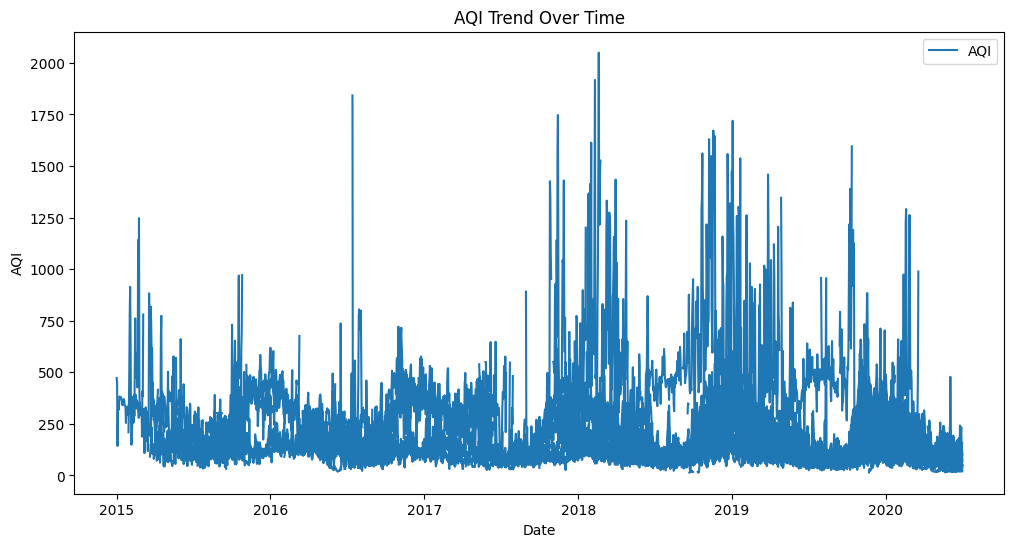

In [2]:
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['AQI'], label='AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Trend Over Time')
plt.legend()
plt.show()

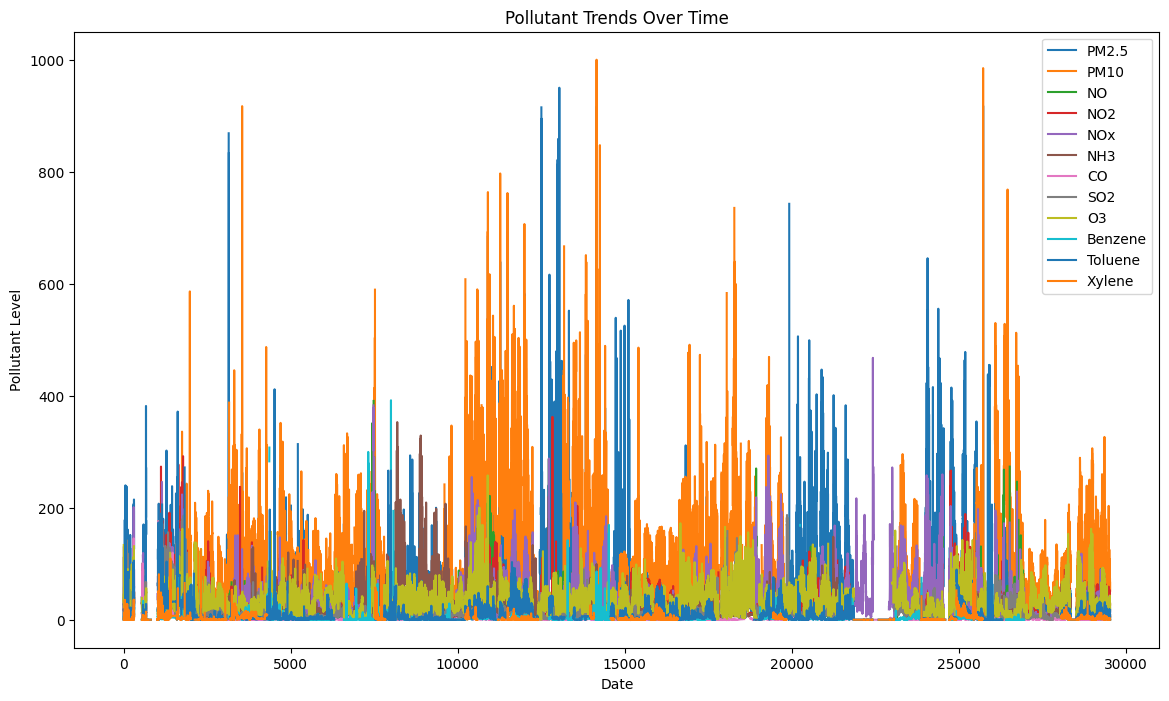

In [17]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

plt.figure(figsize=(14,8))
for pollutant in pollutants:
    plt.plot(data.index, data[pollutant], label=pollutant)
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.title('Pollutant Trends Over Time')
plt.legend()
plt.show()

C:\Users\Aseem\AppData\Local\Temp\ipykernel_27576\1804840561.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['AQI'].resample('M').mean()


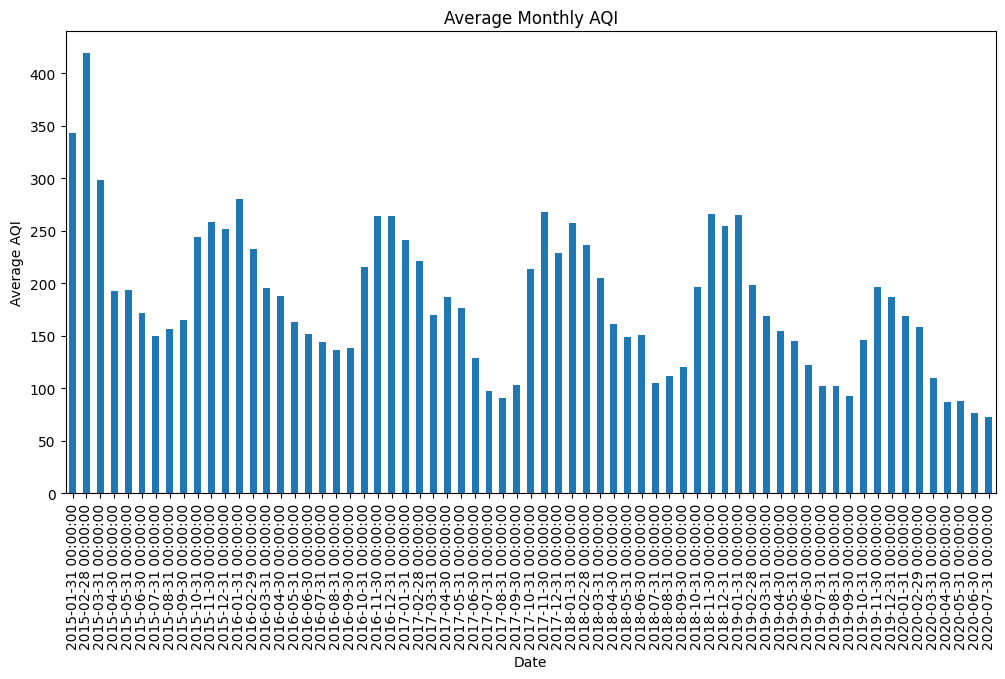

In [4]:
monthly_data = data['AQI'].resample('M').mean()

plt.figure(figsize=(12,6))
monthly_data.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.title('Average Monthly AQI')
plt.show()

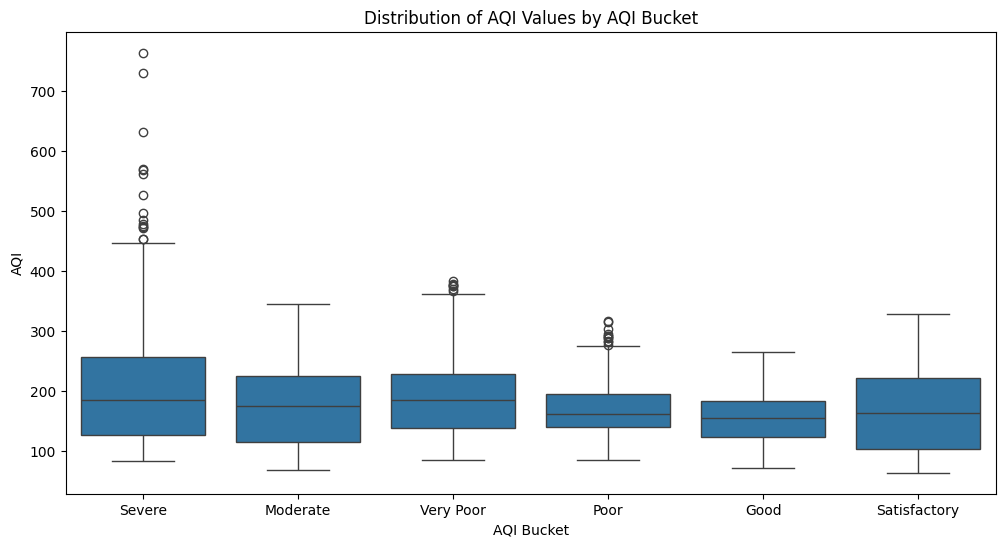

In [13]:
data = pd.read_csv('city_day.csv')
data['Date'] = pd.to_datetime(data['Date'].str.strip())

numeric_columns = data.select_dtypes(include='number').columns

data_aggregated = data.groupby('Date')[numeric_columns].mean().reset_index()

data_aggregated['AQI_Bucket'] = data.groupby('Date')['AQI_Bucket'].first().reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.boxplot(x='AQI_Bucket', y='AQI', data=data_aggregated)
plt.xlabel('AQI Bucket')
plt.ylabel('AQI')
plt.title('Distribution of AQI Values by AQI Bucket')
plt.show()


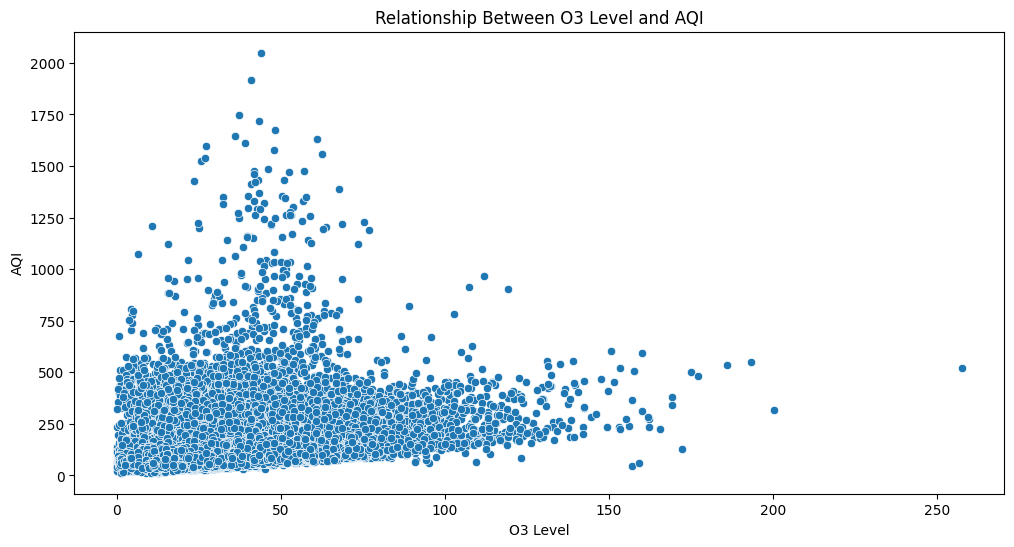

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='O3', y='AQI', data=data)
plt.xlabel('O3 Level')
plt.ylabel('AQI')
plt.title('Relationship Between O3 Level and AQI')
plt.show()